# CreditFix - ML engineer Assignment- Random Forrest & XGBoost

### Problem Statement

In this kernel ,I will try to show you how different models can improve just by doing simple process on the data.

we are going to work on binary classification problem, where we got some information about sample of peoples, and we need to predict whether we should give some one a loan or not depending on his information, so we will go with machine learning techniques to solve our problem.

### Business Understanding

CreditFix is a peer-to-peer lending company, headquartered in Islamabad, Pakistan. It is the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission, Pakistan (SECP), and to offer loan to under-previllige as well as Vehicle purchase on easy installments. Creditfix is the Pakistans leading fintech company aim to facilitate those who got rejected by bank due to insufficient credit history.

Solving this case study will give us an idea about how real business problems are solved using EDA and Machine Learning. In this case study, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Kernel Understanding

1. Libraries, Data description and missing values handling. 
2. Exploratary Data Analysis
3. Feature selection
4. Feature engineering.
5. Model Selection (XGBoost & RandomForestClassifier)
6. Performance Analysis using evaluation metrics. 


### Libraries, Data description and Missing values handling.

In [370]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install imblearn
import tensorflow as tf
import re
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

from xgboost import XGBClassifier




In [295]:
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [296]:
df=pd.read_csv(r'C:\Users\Mustafa Minhas\PycharmProjects\CreditFix - Assigment\data.csv')
df.shape

data=pd.read_csv(r'C:\Users\Mustafa Minhas\PycharmProjects\CreditFix - Assigment\data.csv') #just for seaborn



In [297]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')

In [298]:
print (df.dtypes)

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACC

In [299]:
df.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,...,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00
mean,535917.57,54356.99,75865.07,74.75,72.94,19638.64,69.03,3396.88,7.26,1549.48,...,0.01,5427.79,7295.92,7180.00,13105.48,323.27,0.38,0.10,0.21,0.22
std,68315.69,12971.31,18944.78,11.46,69.83,3491.95,22.14,2238.15,4.48,975.26,...,0.11,170236.99,183155.99,182592.50,151367.90,15553.69,0.96,0.38,0.71,0.41
min,417428.00,13320.00,37000.00,10.03,1.00,10524.00,45.00,1.00,1.00,1.00,...,0.00,-574647.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,476786.25,47145.00,65717.00,68.88,14.00,16535.00,48.00,1511.00,4.00,713.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,535978.50,53803.00,70946.00,76.80,61.00,20333.00,86.00,2970.00,6.00,1451.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,595039.75,60413.00,79201.75,83.67,130.00,23000.00,86.00,5677.00,10.00,2362.00,...,0.00,0.00,0.00,0.00,1999.00,0.00,0.00,0.00,0.00,0.00
max,671084.00,990572.00,1628992.00,95.00,261.00,24803.00,156.00,7345.00,22.00,3795.00,...,8.00,36032852.00,30000000.00,30000000.00,25642806.00,4170901.00,35.00,20.00,36.00,1.00


Fields who have more then 50% Missing values will be removed. 

In [300]:

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [301]:
# Missing values statistics of Customers
missing_values = missing_values_table(df)
missing_values.head(40)

Your selected dataframe has 41 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
EMPLOYMENT_TYPE,7661,3.30


3.3% misssing values of EMPLOYMENT_TYPE, so we can replace them by Label

In [302]:
df['EMPLOYMENT_TYPE'].fillna('Unemployed', inplace = True)

# let's check if there is any null values still left or not
print("Null values left in the dataset:", df.isnull().sum().sum())


Null values left in the dataset: 0


### Exploratary Data Analysis

##### Task 1: Analyze, using graphs, how different fields (loan info and loanee info) correlate to a loanee defaulting his/her loan or not.

We will first look at the target variable, i.e., Loan_default. As it is a int64 variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable

<AxesSubplot:>

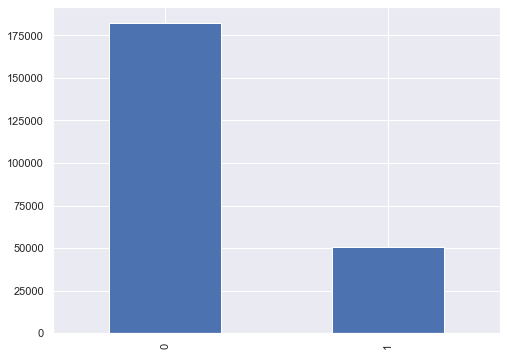

In [303]:
df['LOAN_DEFAULT'].value_counts()
df['LOAN_DEFAULT'].value_counts(normalize=True) #'TRUE' to print proportions instead of number
df['LOAN_DEFAULT'].value_counts().plot.bar()


###### Co-relation martrix of all variables with each other

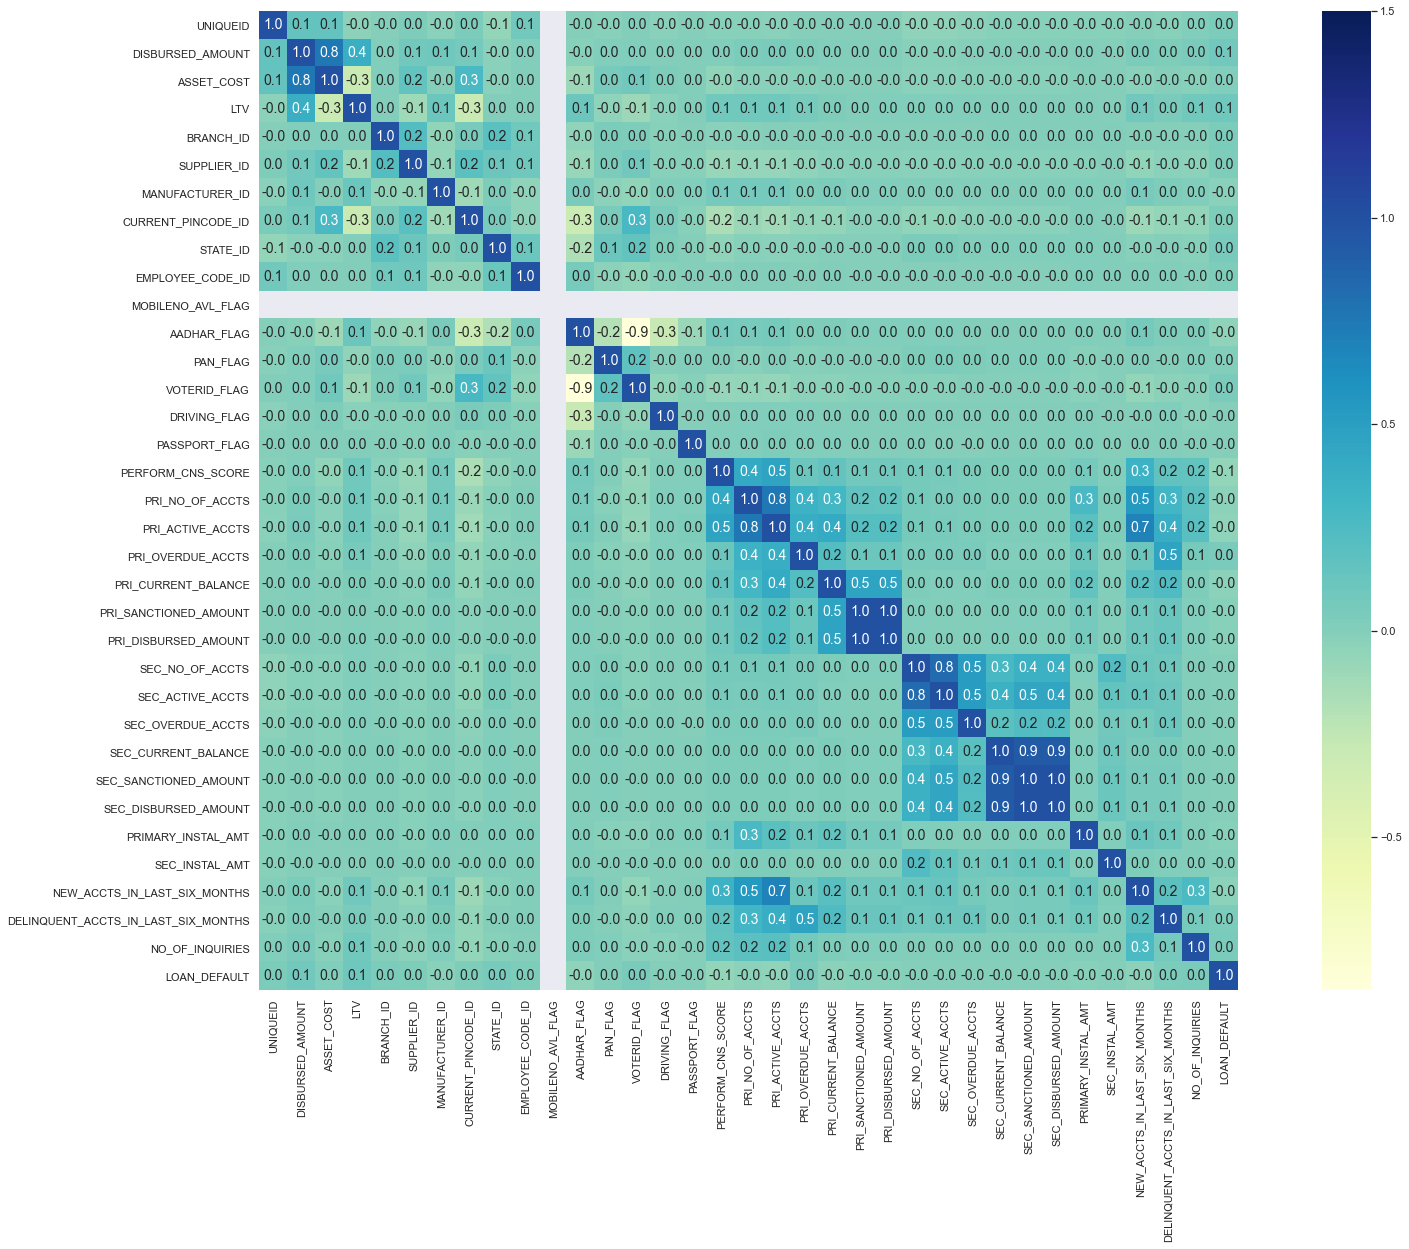

In [304]:
matrix = df.corr() 
f, ax = plt.subplots(figsize=(30, 18)) 
sns.heatmap(matrix, vmax=1.5, square=True,annot=True, fmt=".1f",cmap="YlGnBu")
plt.show()

In [305]:
#Another way to co-relate

# plt.figure(figsize=(16, 14))
# sns.heatmap(df.corr(), annot=True, cmap='viridis')

Most Co-related features are: 
1. PRI Sanctioned Amount & PRI Disbursed Amount. (1.0)
2. PRI No. of Accts & PRI Active Accts. (0.8)
3. SEC. No. of Accts & SEC.Active Accts. (1.0)
4. SEC. Current Balance & SEC Sanctioned Amount. (0.9)
5. SEC. Current Balance & SEC. Disbursed Amount. (0.9)
6. SEC Sanctioned Amount & SEC. Disbursed Amount. (1.0)
7. Adhar_flag & VoterID_flag. (-0.9)
8. New Accts in last 6 months & PRI Active Accts.(0.7)
9. Disbursed_Amount & Asset_cost.(0.7)

Performing log transformations on disbursed amount, ltv, and asset cost to plot them and do EDA

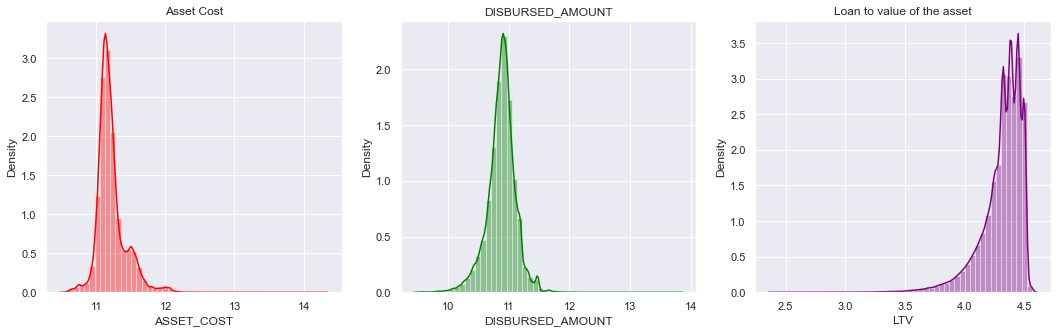

In [306]:
df['DISBURSED_AMOUNT'] = np.log1p(df['DISBURSED_AMOUNT'])
df['LTV'] = np.log1p(df['LTV'])
df['ASSET_COST'] = np.log1p(df['ASSET_COST'])

plt.rcParams['figure.figsize'] = (18, 5) # plotting dfing dataset

plt.subplot(1, 3, 1)
sns.distplot(df['ASSET_COST'], color = 'red')
plt.title('Asset Cost')


plt.subplot(1, 3, 2)
sns.distplot(df['DISBURSED_AMOUNT'],  color = 'green')
plt.title('DISBURSED_AMOUNT')


plt.subplot(1, 3, 3)
sns.distplot(df['LTV'], color = 'purple')
plt.title('Loan to value of the asset')

plt.show()

Fig shows, ASSET_COST and DISBURSED_AMOUNT are nicely distributed, while LTV Shows Left Skewness

##### Sub Task1: Deduce new field in the data; such as age of the loanee based on the Date of birth.

Converting DOB to Dataframe to deduce AGE

Text(0.5, 1.0, 'Distribution of YOB')

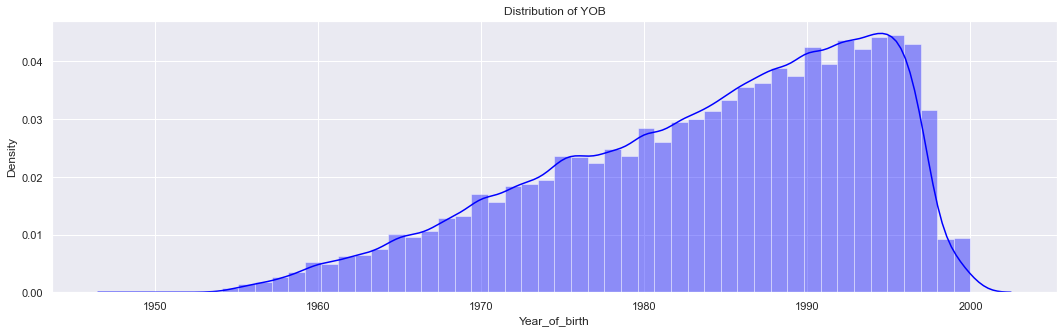

In [307]:
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'],errors = 'coerce')
df['Year_of_birth'] = df['DATE_OF_BIRTH'].dt.year # extracting the year of birth of the customers
df['AGE'] = 2021 - df['Year_of_birth'] 
sns.distplot(df['Year_of_birth'], color = 'Blue') # checking the values inside date of year
plt.title('Distribution of YOB')

New Column 'AGE' generated

In [308]:
df['AGE']

0         37
1         36
2         36
3         28
4         44
          ..
233149    33
233150    33
233151    45
233152    27
233153    37
Name: AGE, Length: 233154, dtype: int64

#### Analysing IDs - Customer Integrity

##### Task2: Analyze, using graphs, whether the demographic data plays a major role in a loanee defaulting his/her loan or the financial data.

In [309]:
print("Total no. of Unique Ids :", df['UNIQUEID'].nunique())
print("Total no. of Unique Branches :", df['BRANCH_ID'].nunique())
print("Total no. of Unique Suppliers :", df['SUPPLIER_ID'].nunique())
print("Total no. of Unique Manufactures :", df['MANUFACTURER_ID'].nunique())
print("Total no. of Unique Current pincode Ids :", df['CURRENT_PINCODE_ID'].nunique())
print("Total no. of Unique State IDs :", df['STATE_ID'].nunique())
print("Total no. of Unique Employee code IDs :", df['EMPLOYEE_CODE_ID'].nunique())


Total no. of Unique Ids : 233154
Total no. of Unique Branches : 82
Total no. of Unique Suppliers : 2953
Total no. of Unique Manufactures : 11
Total no. of Unique Current pincode Ids : 6698
Total no. of Unique State IDs : 22
Total no. of Unique Employee code IDs : 3270


In [1]:
# plt.figure(1) 
# plt.subplot(311) 

# df['MANUFACTURER_ID'].value_counts(normalize=True).plot.bar(figsize=(24,10), title= 'MANUFACTURE_ID', fontsize=14) 
# plt.subplot(312) 
# df['STATE_ID'].value_counts(normalize=True).plot.bar(title= 'STATE_ID',fontsize=14) 
# plt.subplot(313) 
# df['BRANCH_ID'].value_counts(normalize=True).plot.bar(title= 'BRANCH_ID', fontsize=10) 

# plt.show()

In [311]:
def plot_bar_comp(var,nrow):
    
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.countplot(df[feature])
        sns.countplot(df[feature])
        plt.ylabel('Count plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

<Figure size 1296x360 with 0 Axes>

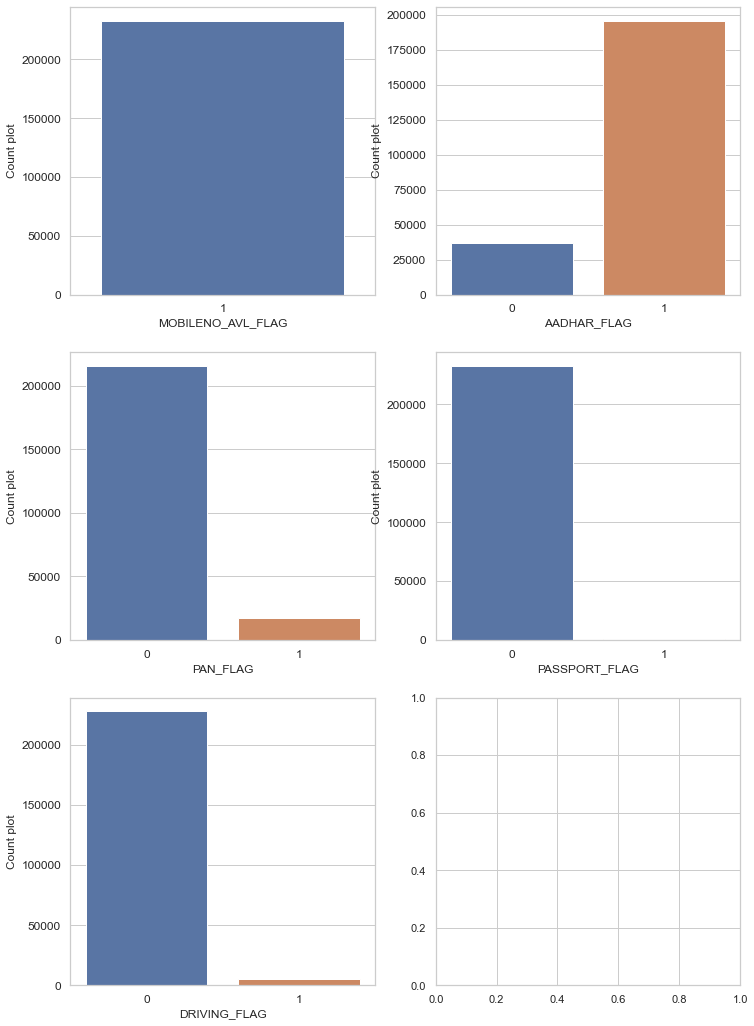

In [312]:
var = ['MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'PASSPORT_FLAG', 'DRIVING_FLAG']
plot_bar_comp(var,nrow=3)

0    199360
1     33794
Name: VOTERID_FLAG, dtype: int64

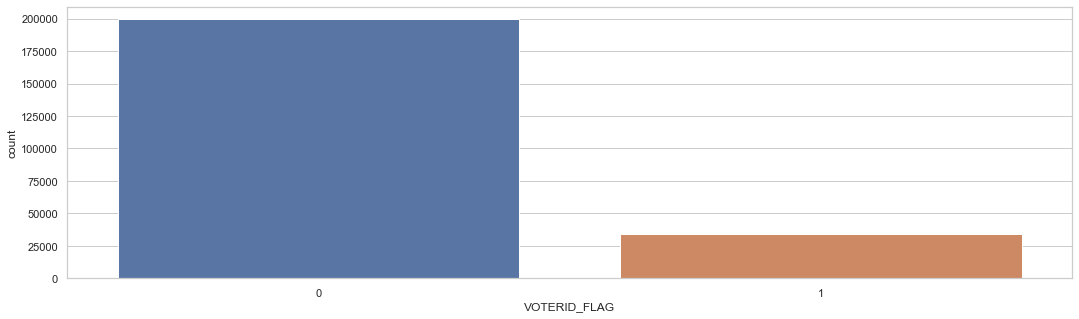

In [313]:
# customer shared voter-id card or not
sns.countplot(x="VOTERID_FLAG", data=df)
df['VOTERID_FLAG'].value_counts()

In [314]:
df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))
df['EMPLOYMENT_TYPE'].value_counts() # checking the values  of employement type

2    127635
1     97858
0      7661
Name: EMPLOYMENT_TYPE, dtype: int64

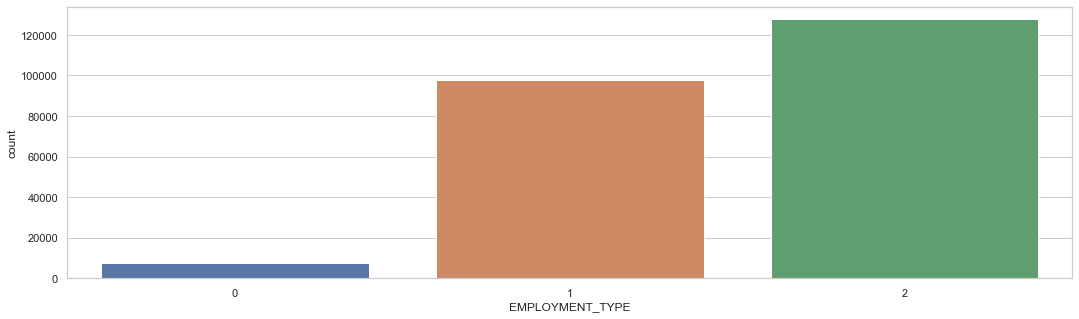

2    127635
1     97858
0      7661
Name: EMPLOYMENT_TYPE, dtype: int64

In [315]:
sns.countplot(x='EMPLOYMENT_TYPE',data=df)
plt.show()
df['EMPLOYMENT_TYPE'].value_counts()

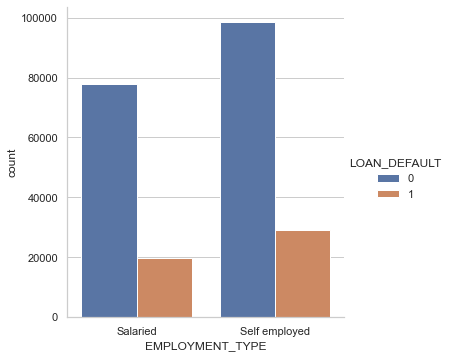

In [316]:
# Employment Type
sns.catplot(data=data,kind='count',x='EMPLOYMENT_TYPE',hue='LOAN_DEFAULT')

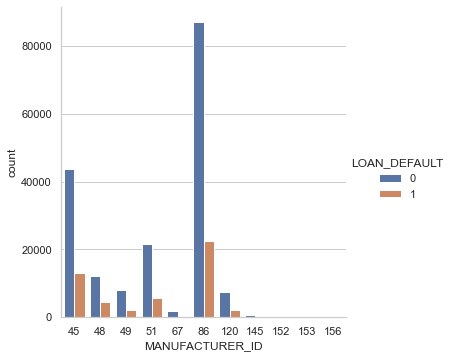

In [317]:
# MANUFACTURER_ID
sns.catplot(data=data,kind='count',x='MANUFACTURER_ID',hue='LOAN_DEFAULT')

#### CNS SCORE-Visualization

Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)

<AxesSubplot:xlabel='PERFORM_CNS_SCORE', ylabel='PRI_ACTIVE_ACCTS'>

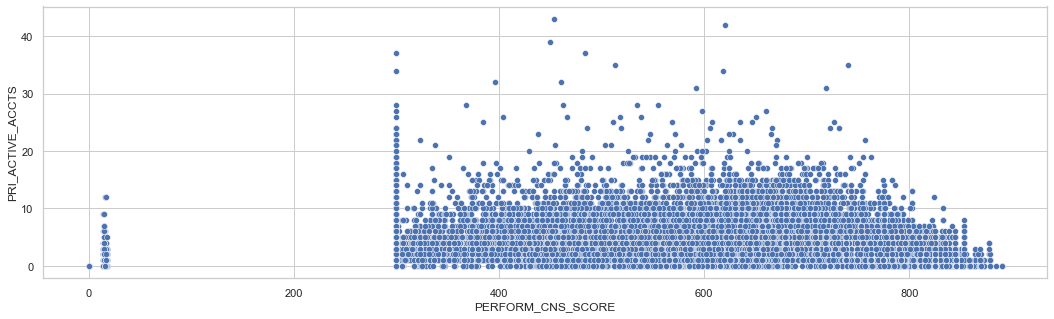

In [318]:
df = df[df['PRI_ACTIVE_ACCTS']<50]
sns.scatterplot(x=df['PERFORM_CNS_SCORE'],y=df['PRI_ACTIVE_ACCTS'])

In [319]:
# df = df[df['AGE']<50]
# sns.lineplot(x=df['AVERAGE_ACCT_AGE'],y=df['LOAN_DEFAULT'])

<AxesSubplot:xlabel='PERFORM_CNS_SCORE', ylabel='PRI_ACTIVE_ACCTS'>

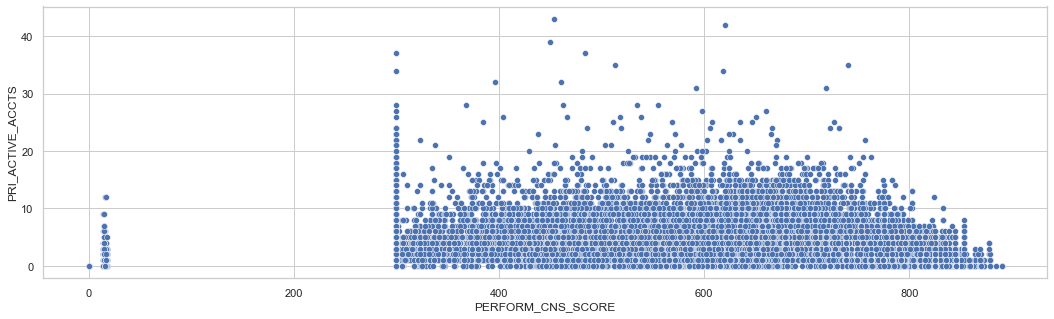

In [320]:
df = df[df['SEC_ACTIVE_ACCTS']<28]
sns.scatterplot(x=df['PERFORM_CNS_SCORE'],y=df['PRI_ACTIVE_ACCTS'])

Feature Extraction from Disbursal Dates

In [321]:
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'], errors = 'coerce')
df['DisbursalMonth'] = df['DISBURSAL_DATE'].dt.month # extracting the month of the disbursement
df['DisbursalMonth'].value_counts()

10    84873
8     56974
9     54442
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DisbursalMonth, dtype: int64

Text(0.5, 1.0, 'Months')

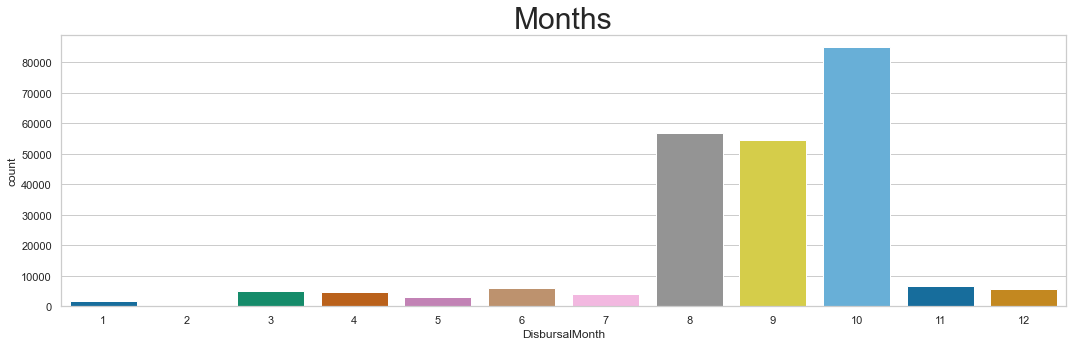

In [322]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(df['DisbursalMonth'], palette = 'colorblind')
plt.title('Months', fontsize = 30)

Most Amount Disbursed in Month 'OCTOBER'

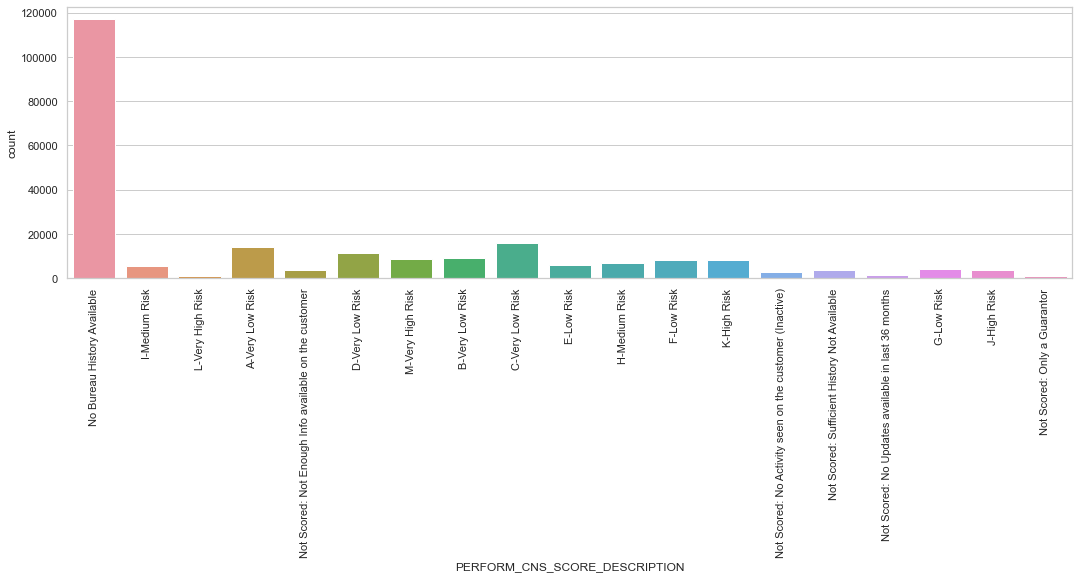

No Bureau History Available                                116949
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [323]:
sns.countplot(x='PERFORM_CNS_SCORE_DESCRIPTION',data=df) 
plt.xticks(rotation = 90)
plt.show()

df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

In [324]:
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 0 if (x=='No Bureau History Available') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: Sufficient History Not Available') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: Not Enough Info available on the customer') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: No Activity seen on the customer (Inactive)') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: No Updates available in last 36 months') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: Only a Guarantor') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: More than 50 active Accounts found') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 1 if (x=='M-Very High Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 1 if (x=='L-Very High Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 2 if (x=='K-High Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 2 if (x=='J-High Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 3 if (x=='I-Medium Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 3 if (x=='H-Medium Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 4 if (x=='G-Low Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 4 if (x=='F-Low Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 4 if (x=='E-Low Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 5 if (x=='D-Very Low Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 5 if (x=='C-Very Low Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 5 if (x=='B-Very Low Risk') else x )
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(lambda x: 5 if (x=='A-Very Low Risk') else x )




In [325]:
df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

0    129781
5     50728
4     18294
3     12412
2     12025
1      9910
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

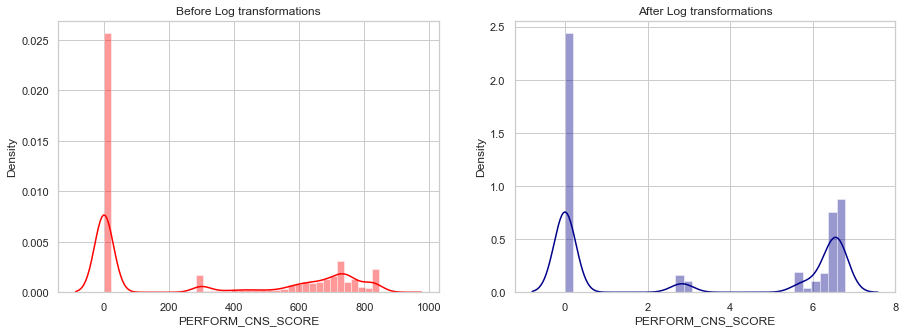

In [326]:
#checking the bureau score

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(df['PERFORM_CNS_SCORE'], color = 'red')
plt.title('Before Log transformations')

# tranforming to log 

plt.subplot(1, 2, 2)
df['PERFORM_CNS_SCORE'] = np.log1p(df['PERFORM_CNS_SCORE'])
sns.distplot(df['PERFORM_CNS_SCORE'], color = 'darkblue')
plt.title('After Log transformations')
plt.show()



In [327]:
#  applying log transformations to the primary account attributes

df['PRI_NO_OF_ACCTS'] = np.log1p(df['PRI_NO_OF_ACCTS'])
df['PRI_ACTIVE_ACCTS'] = np.log1p(df['PRI_ACTIVE_ACCTS'])
df['PRI_OVERDUE_ACCTS'] = np.log1p(df['PRI_OVERDUE_ACCTS'])
# df['PRI_CURRENT_BALANCE'] = np.log1p(df['PRI_CURRENT_BALANCE'])
# df['PRI_SANCTIONED_AMOUNT'] = np.log1p(df['PRI_SANCTIONED_AMOUNT'])
df['PRI_DISBURSED_AMOUNT'] = np.log1p(df['PRI_DISBURSED_AMOUNT'])


#  filling  missing values in sec.current.balance
df['PRI_CURRENT_BALANCE'].fillna(df['PRI_CURRENT_BALANCE'].mean(), inplace = True)
df['PRI_SANCTIONED_AMOUNT'].fillna(df['PRI_SANCTIONED_AMOUNT'].mean(), inplace = True)

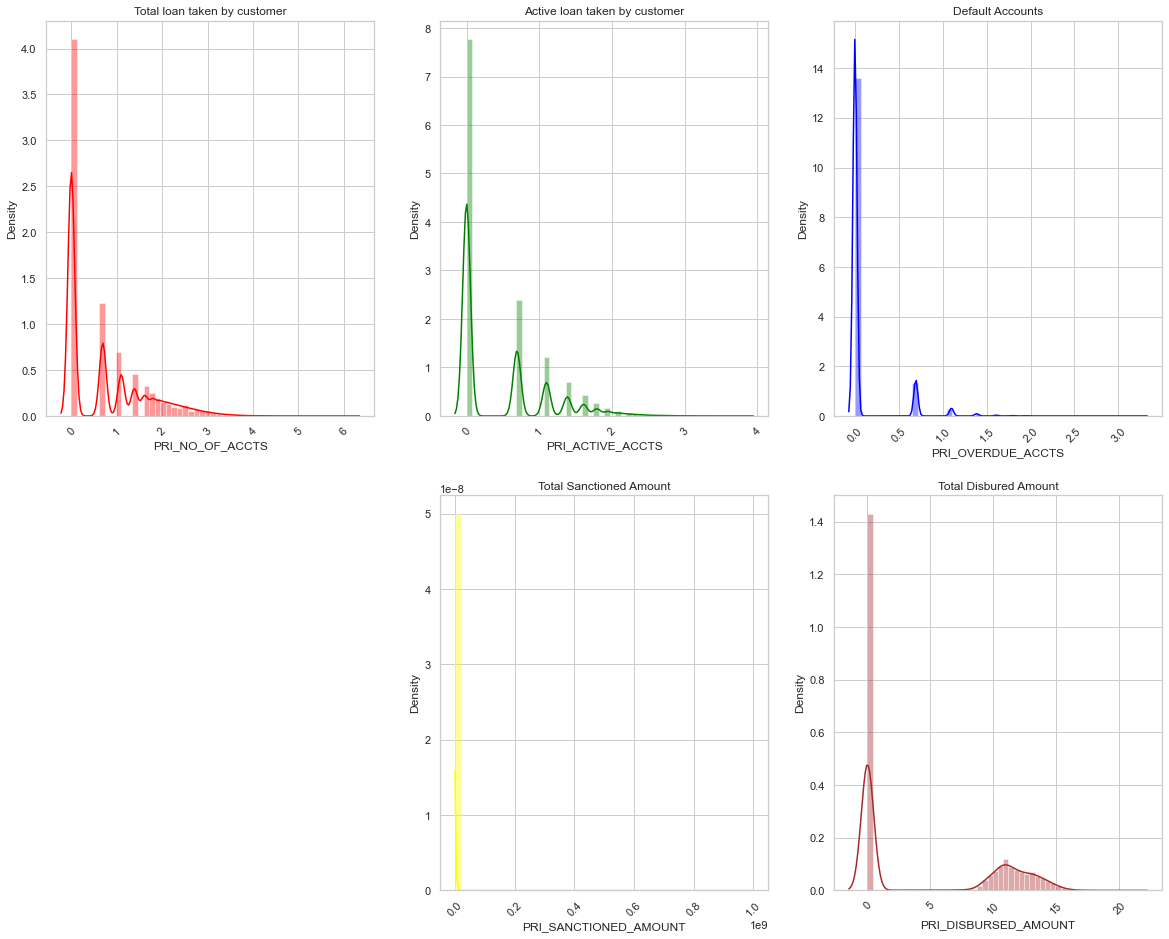

In [328]:
plt.rcParams['figure.figsize'] = (20, 16)    
plt.subplot(2, 3, 1)
sns.distplot(df['PRI_NO_OF_ACCTS'], color = 'red')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(df['PRI_ACTIVE_ACCTS'], color = 'green')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(df['PRI_OVERDUE_ACCTS'], color = 'blue')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

# plt.subplot(2, 3, 4)
# sns.distplot(df['PRI_CURRENT_BALANCE'], color = 'red')
# plt.title('Principal Outstanding amount')
# plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(df['PRI_SANCTIONED_AMOUNT'], color = 'yellow')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(df['PRI_DISBURSED_AMOUNT'], color = 'brown')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

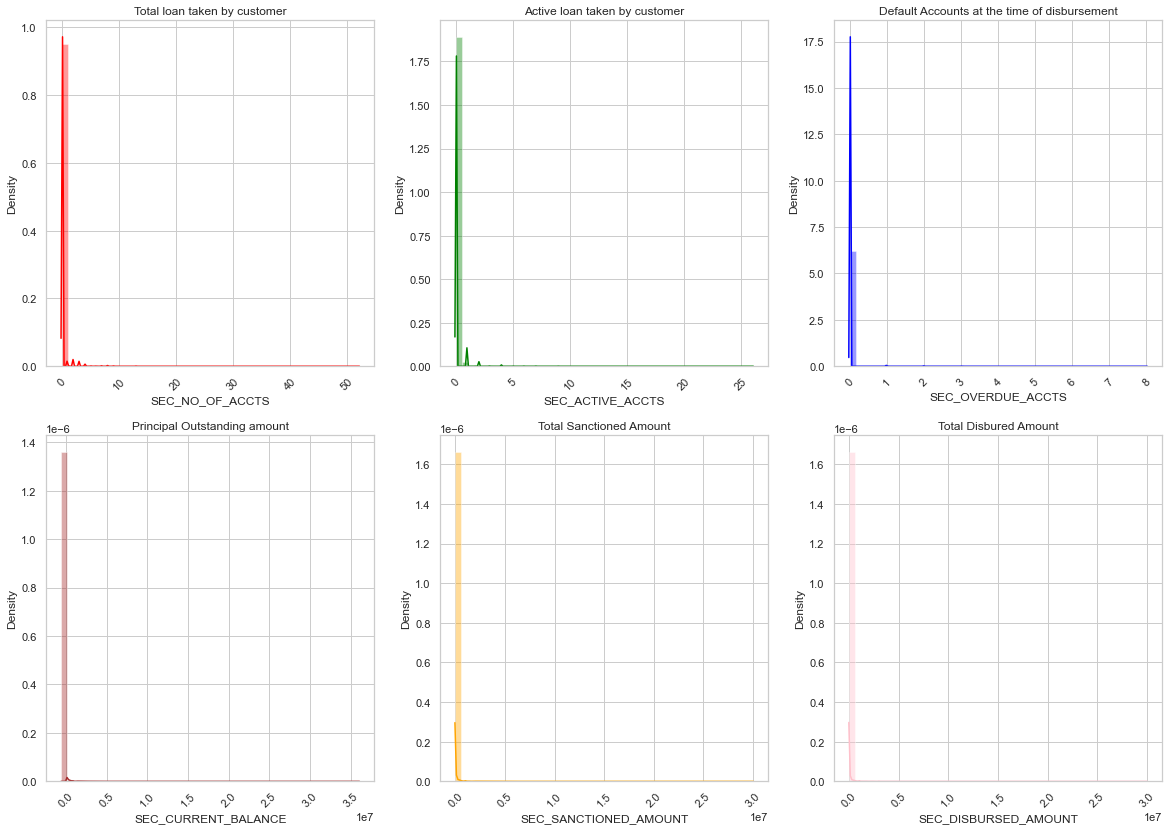

In [329]:
plt.rcParams['figure.figsize'] = (20, 14)    
plt.subplot(2, 3, 1)
sns.distplot(df['SEC_NO_OF_ACCTS'], color = 'red')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(df['SEC_ACTIVE_ACCTS'], color = 'green')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(df['SEC_OVERDUE_ACCTS'], color = 'blue')
plt.title('Default Accounts at the time of disbursement')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(df['SEC_CURRENT_BALANCE'], color = 'brown')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(df['SEC_SANCTIONED_AMOUNT'], color = 'orange')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(df['SEC_DISBURSED_AMOUNT'], color = 'pink')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

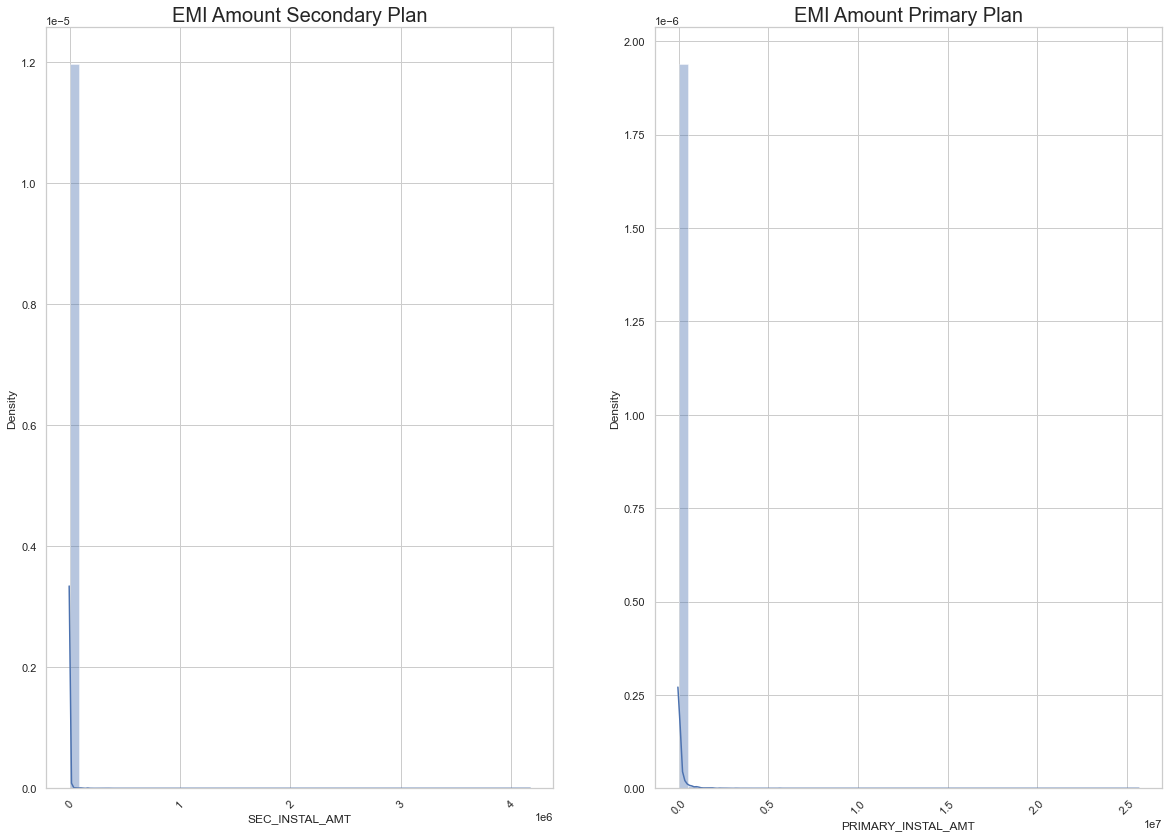

In [330]:
# EMI Amount of the Secondary Plan

plt.subplot(1, 2, 1)
sns.distplot(df['SEC_INSTAL_AMT'])
plt.title('EMI Amount Secondary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.distplot(df['PRIMARY_INSTAL_AMT'])
plt.title('EMI Amount Primary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.show()

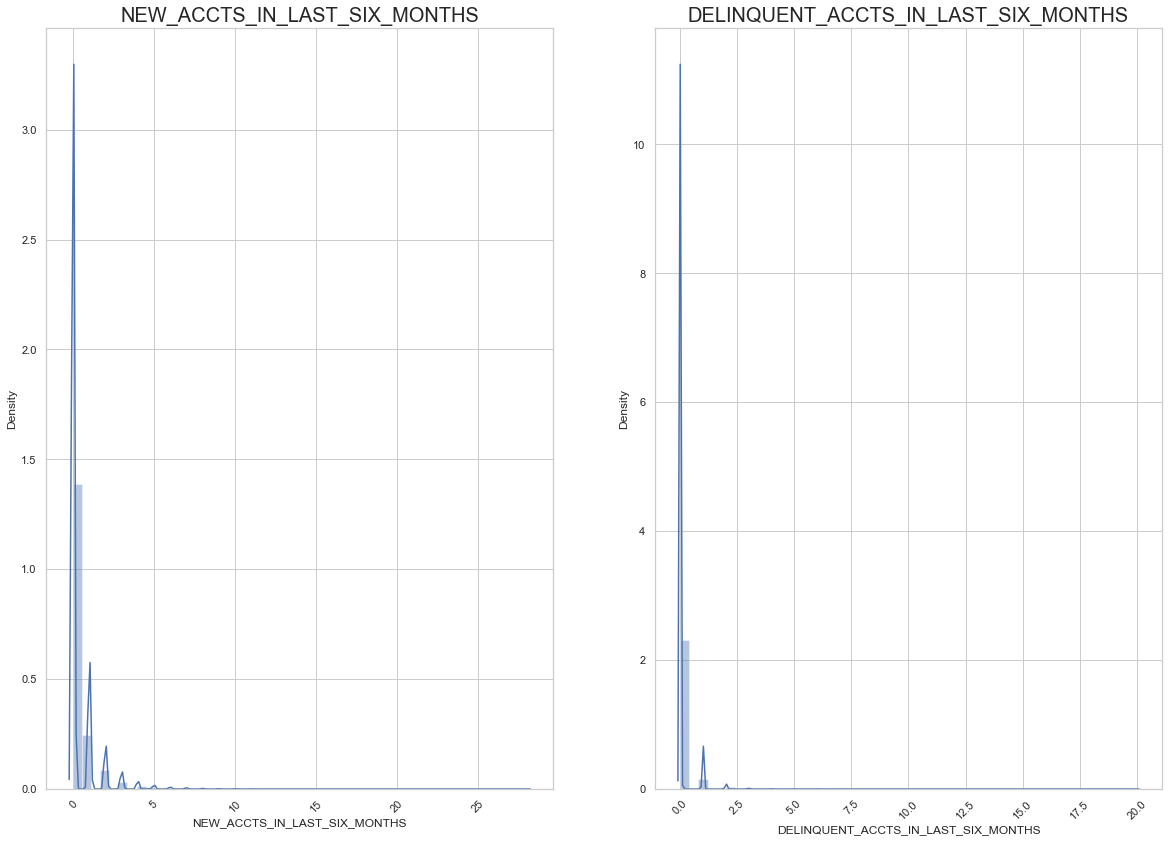

In [331]:
plt.subplot(1, 2, 1)
sns.distplot(df['NEW_ACCTS_IN_LAST_SIX_MONTHS'])
plt.title('NEW_ACCTS_IN_LAST_SIX_MONTHS', fontsize = 20)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.distplot(df['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'])
plt.title('DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', fontsize = 20)
plt.xticks(rotation = 45)

plt.show()

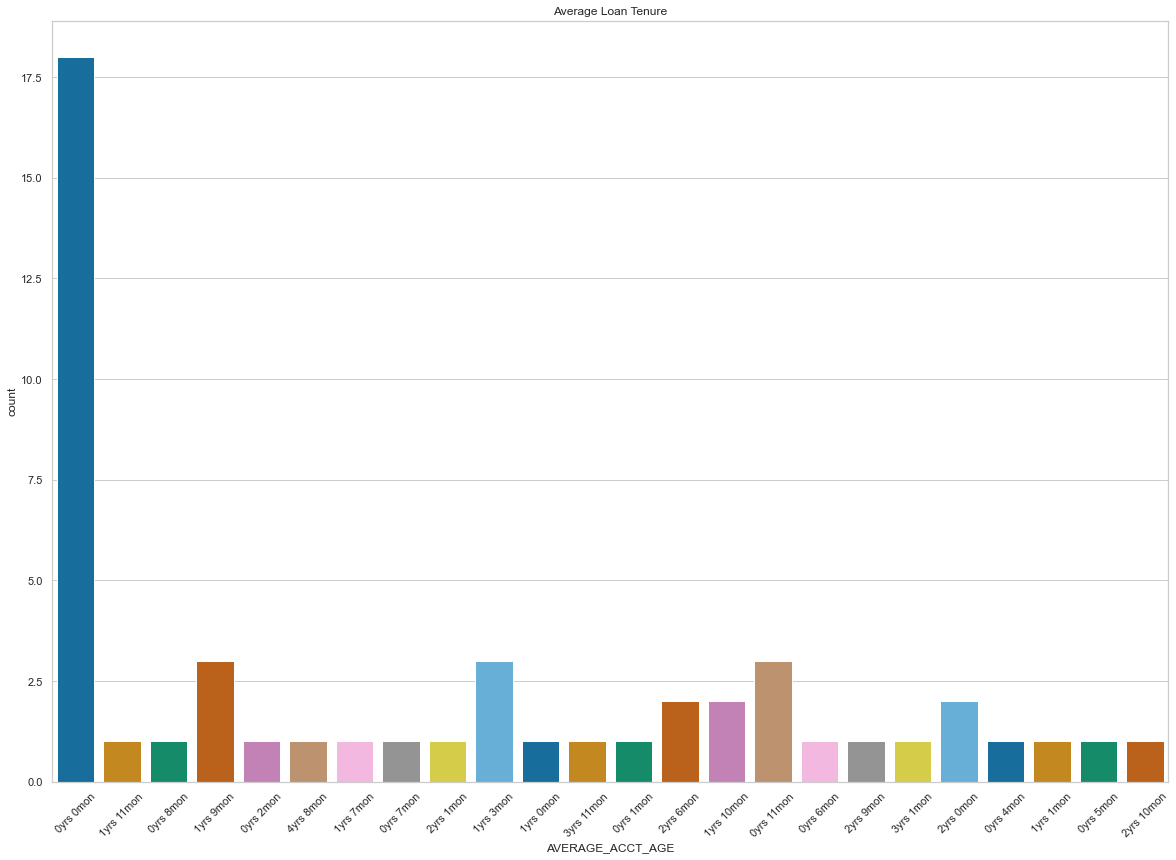

In [332]:
# average.acct.age i.e., average loan tenure

sns.countplot(df['AVERAGE_ACCT_AGE'].head(50), palette = 'colorblind')
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)
plt.show()

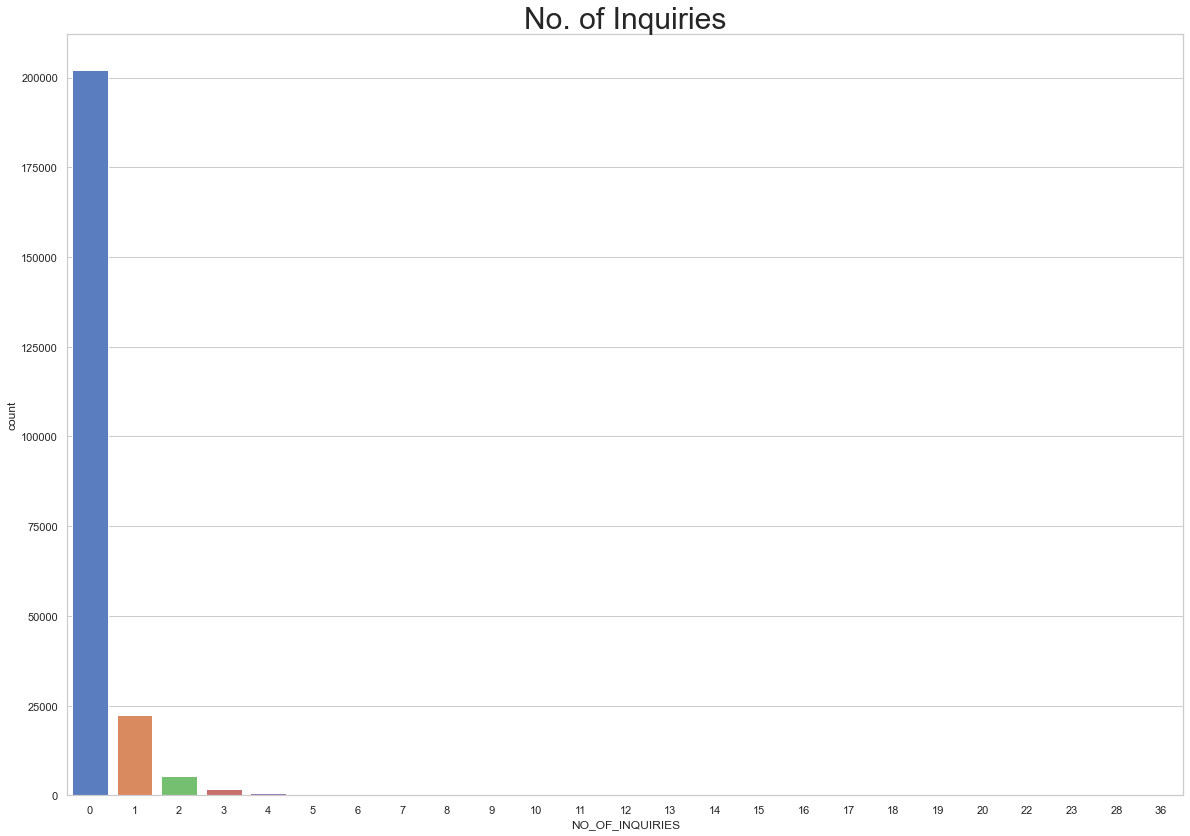

0     201958
1      22284
2       5409
3       1767
4        760
5        343
6        239
7        135
8        105
9         44
10        34
11        15
12        14
14         8
15         7
13         6
19         6
17         4
18         4
16         3
20         1
22         1
23         1
28         1
36         1
Name: NO_OF_INQUIRIES, dtype: int64

In [333]:
sns.countplot(df['NO_OF_INQUIRIES'], palette = 'muted')
plt.title('No. of Inquiries',  fontsize = 30)
plt.show()
df['NO_OF_INQUIRIES'].value_counts()

Calculating DOWN_PAYMENT

<AxesSubplot:>

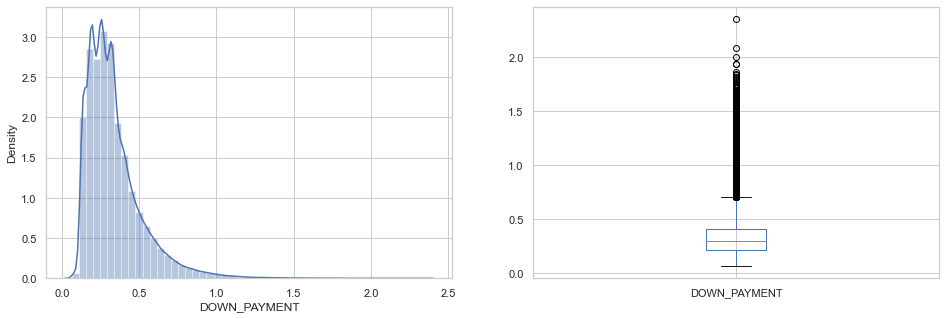

In [334]:
df['DOWN_PAYMENT']=df['ASSET_COST']-df['DISBURSED_AMOUNT'] 

plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['DOWN_PAYMENT']);
plt.subplot(122) 
df['DOWN_PAYMENT'].plot.box(figsize=(16,5))

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s tae the log transformation to make the distribution normal.

<AxesSubplot:>

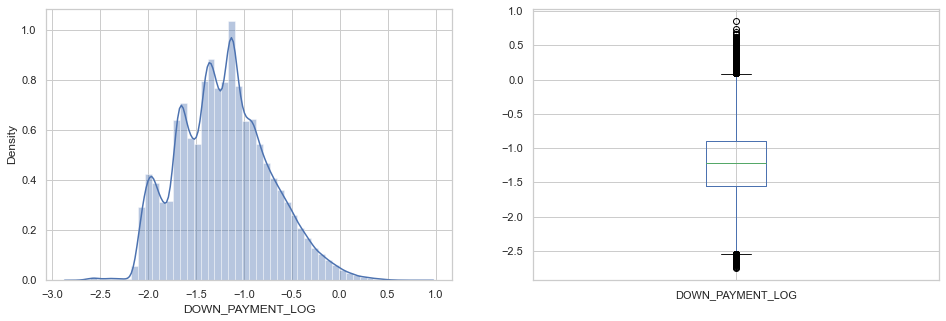

In [335]:
df['DOWN_PAYMENT_LOG'] = np.log(df['DOWN_PAYMENT'])
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['DOWN_PAYMENT_LOG']);
plt.subplot(122) 
df['DOWN_PAYMENT_LOG'].plot.box(figsize=(16,5))


Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.



### Feature Engineering

In [336]:
df['BRANCH_ID'] = df['BRANCH_ID'].astype('category')
df['MANUFACTURER_ID'] = df['MANUFACTURER_ID'].astype('category')
df['STATE_ID'] = df['STATE_ID'].astype('category')

le = LabelEncoder()
df['BRANCH_ID'] = le.fit_transform(df['BRANCH_ID'])
df['MANUFACTURER_ID'] = le.fit_transform(df['MANUFACTURER_ID'])
df['STATE_ID'] = le.fit_transform(df['STATE_ID'])

### Feature Selection

Removing All those features who has got less importance 

In [337]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'Year_of_birth', 'AGE', 'DisbursalMonth',
       'DOWN_PAYMENT', 'DOWN_PAYMENT_LOG'],
      dty

In [338]:
#Useless features
#df=df.drop(['SUPPLIER_ID','EMPLOYMENT_TYPE','AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'EMPLOYEE_CODE_ID','PRI_DISBURSED_AMOUNT', 'DISBURSED_AMOUNT','PRI_NO_OF_ACCTS','SEC_NO_OF_ACCTS','SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT','VOTERID_FLAG','PRI_ACTIVE_ACCTS','BRANCH_ID', 'MANUFACTURER_ID', 'STATE_ID'], axis=1) 

#Useless features
#train = train.drop(['DISBURSED_AMOUNT','ASSET_COST', 'LTV', 'PRI_NO_OF_ACCTS','PRI_OVERDUE_ACCTS', 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)
df = df.drop([ 'DATE_OF_BIRTH' , 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)

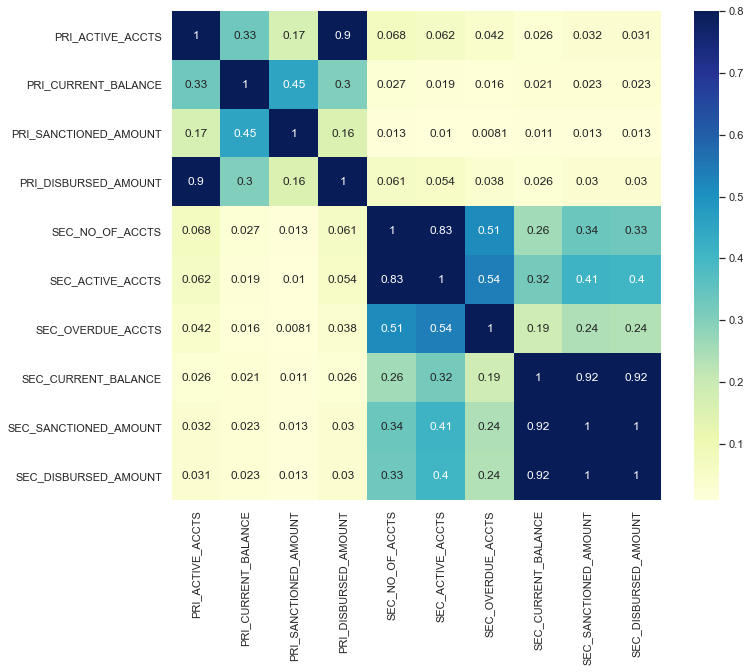

In [339]:
#Highly Correlated
sns.set()

cols = df[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 
              'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
              'SEC_DISBURSED_AMOUNT']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

1. Not highly correlated with anyone: 'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT','SEC_OVERDUE_ACCTS'
2. 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS' are highly positively correlated, hence keeping one
3. 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT' are highly positively correlated, hence keeping one

In [340]:

X = df.drop('LOAN_DEFAULT',1) 
y = df.LOAN_DEFAULT

# print(X.dtypes)
y.isnull().values.any()

False

#### Task 3: Present the fields that should be used in the future analysis.

In [341]:
#These fields are relevent among various features that will help us to predict our target variable i.e Loan Defaulter
X.head() #Checking for any string variables


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,DISBURSAL_DATE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,...,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Year_of_birth,AGE,DisbursalMonth,DOWN_PAYMENT,DOWN_PAYMENT_LOG
0,420825,10.83,10.98,4.51,1,2018-03-08,1,1,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,1984,37,3,0.14,-1.94
1,537409,10.76,11.09,4.31,2,2018-09-26,1,1,0,0,...,0,1,1yrs 11mon,1yrs 11mon,0,1985,36,9,0.33,-1.11
2,417566,10.88,11.02,4.51,2,2018-01-08,1,1,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,1985,36,1,0.14,-1.96
3,624493,10.96,11.10,4.49,2,2018-10-26,1,1,0,0,...,0,0,0yrs 8mon,1yrs 3mon,1,1993,28,10,0.14,-1.97
4,539055,10.87,11.01,4.49,2,2018-09-26,1,1,0,0,...,0,0,0yrs 0mon,0yrs 0mon,1,1977,44,9,0.14,-1.96


### Model Selection 

1- RandomForestClassifier

In [365]:

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3,random_state =4)

print(x_train.shape)
print(x_cv.shape)
print(y_train.shape)
print(y_cv.shape)

a=np.all(np.isfinite(y_cv))
print(a)

(163205, 38)
(69945, 38)
(163205,)
(69945,)
True


Handling Class imbalancing using SMoTE (Synthetic Minority Over-sampling Technique )

In [342]:
# Handing Class im balance
from imblearn.combine import SMOTETomek
smt = SMOTETomek('auto')
X_smt, y_smt = smt.fit_resample(x_train, y_train)

In [343]:

cv =StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

In [344]:

rf= RandomForestClassifier(max_depth = 10, n_estimators=300,verbose=1, n_jobs=1,random_state=42)

In [345]:
forest=rf.fit(X_smt,y_smt)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.7min finished


In [346]:
print(forest.score(X_smt,y_smt))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.71915561405285


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    8.8s finished


In [347]:
pre = forest.predict(X_smt)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    7.0s finished


In [348]:
pre_ = forest.predict_proba(X_smt)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    7.0s finished


In [349]:
pred = forest.predict(x_cv)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.0s finished


In [350]:
pred_=forest.predict_proba(x_cv)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.2s finished


<AxesSubplot:>

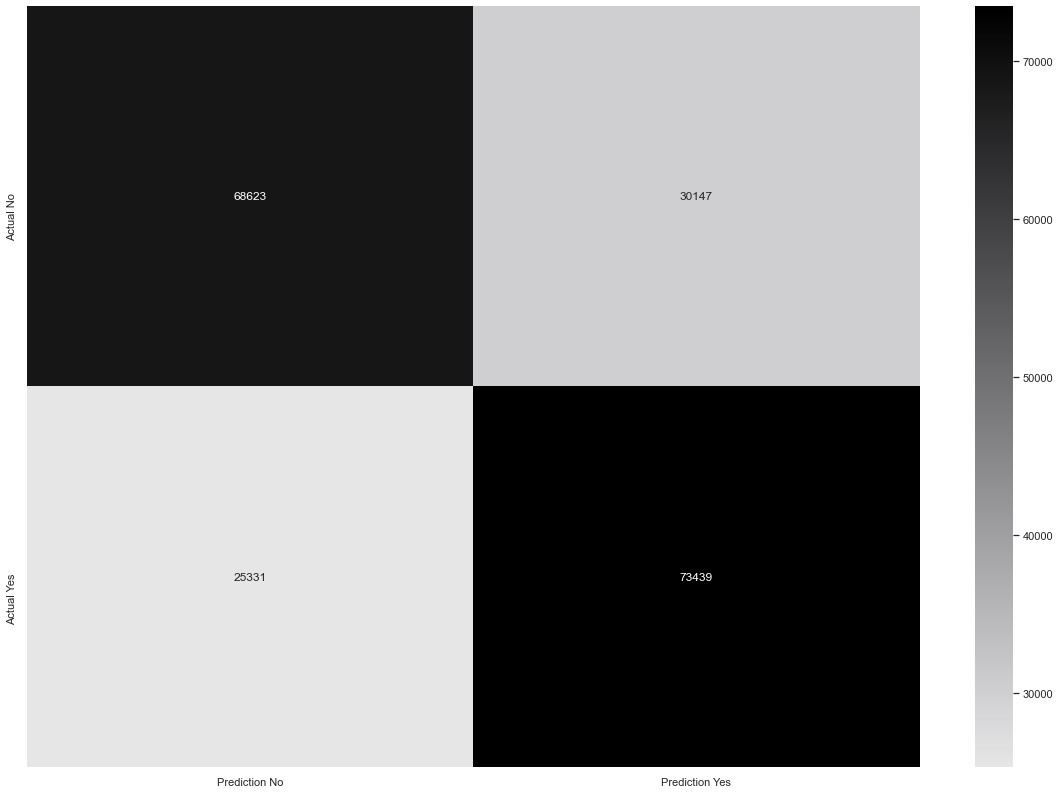

In [351]:
df_confusion_rf = confusion_matrix(y_smt, pre)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [352]:
# print the first 15 true and predicted responses
print('True', y_smt[0:15])
print('Pred', pre[0:15])

True 0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
Name: LOAN_DEFAULT, dtype: int64
Pred [1 1 1 1 0 0 0 1 1 0 0 1 1 0 1]


In [353]:
#comparing the metrics of predicted lebel and real label of test data
print('Accuracy_Score:', accuracy_score(y_smt, pre))

Accuracy_Score: 0.71915561405285


In [354]:
y_smt.shape, pre.shape

((197540,), (197540,))

#### Model Performance -  Evaluation Metrics

In [355]:

print(classification_report(y_smt, pre))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     98770
           1       0.71      0.74      0.73     98770

    accuracy                           0.72    197540
   macro avg       0.72      0.72      0.72    197540
weighted avg       0.72      0.72      0.72    197540



So, with SMOTE running in the backend, RandomForestClassifier provide promising results according to our dataset, as shown our 
f-score is: 0.72
precision : 0.72
recall: 0.72

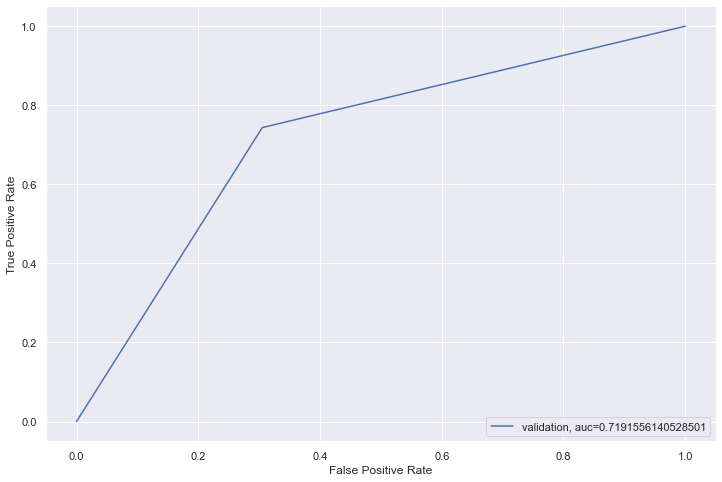

In [356]:
 
fpr, tpr, thresholds = metrics.roc_curve(y_smt, pre) 
auc = metrics.roc_auc_score(y_smt, pre) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

The ROC curve shows the Accuracy of 0.75 aprrox. can this be improve if we apply Cross Validation? Lets check

In [357]:

pre_rf = cross_val_predict(rf, cv=cv, X=X_smt,y=y_smt, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_j

In [358]:

print("auc score =\t" ,roc_auc_score(y_smt, pre_rf))

auc score =	 0.710818062164625


In [359]:
rf.fit(X_smt,y_smt)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.8min finished


RandomForestClassifier(max_depth=10, n_estimators=300, n_jobs=1,
                       random_state=42, verbose=1)

In [360]:
prob_out=rf.predict_proba(X_smt)[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   10.4s finished


In [361]:
pred_out = rf.predict(X_smt)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    7.9s finished


In [362]:
prob_out[0:10], pred_out.shape, prob_out.shape

(array([0.51550198, 0.58200644, 0.55304992, 0.54892384, 0.19824338,
        0.18087497, 0.27446514, 0.51074426, 0.51565274, 0.31450508]),
 (197540,),
 (197540,))

So the K-fold predicts the accuracy of 0.76 at most, So RandomForestClassifier doesnt provide us a good accuracy even after cross folding, Lets crostry it on 'Gradients on steriods i.e. XGBoost'

## XGBClassifier

In [378]:
for f in data.columns: 
    if data[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(data[f].values)) 
        data[f] = lbl.transform(list(data[f].values))

data.fillna((-999), inplace=True) 
data=np.array(data) 
data = data.astype(float) 


In [379]:

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3,random_state =4)

In [380]:

xgb= XGBClassifier(n_estimators=120, learning_rate=1, n_jobs=-1,random_state=42)
predict = cross_val_predict(xgb, cv=cv, X=X_smt,y=y_smt, verbose=1,method='predict_proba')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.7min finished


In [381]:
boost=xgb.fit(X_smt,y_smt)
pred_xgb = boost.predict(X_smt)

[14:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [384]:
pred_xg=boost.predict(X_smt)

In [385]:
print("auc score =\t" ,roc_auc_score(y_smt, pred_xgb))

auc score =	 0.8776450339171813


## So, XGBoost provides a good accuracy score of 0.88% but still there is a room of improvements, and feature engineering process would b fruitful to increase accuracy

In [ ]:
pred_xgb.shape, X_smt.shape, pred_xg.shape, 

In [386]:

xgb= XGBClassifier(n_estimators=120, learning_rate=1, n_jobs=-1,random_state=42)
scores = cross_val_score(xgb, cv=cv, X=X_smt,y=y_smt, verbose=1,scoring='roc_auc')
print("auc\t=\t",scores.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.1min finished


In [387]:
# print the first 15 true and predicted responses
print('True', y_smt[0:15])
print('Pred', pred_xg[0:15])
# y_smt.shape, pred_xg.shape

True 0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
Name: LOAN_DEFAULT, dtype: int64
Pred [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]


#### Task 4: Present your recommendations for the estimators that can be used as a model to predict loan defaults.

### Conclusion

The project has been made in order to predict the defaulter. However, with the given dataset we performed EDA (Exploratory Data Analysis), then took care of missing values. We dig deep into various features both important and unimportant. After Feature engineering and Feature selection process we deploy our dataset onto Machine learning model. We have found out that without applying imbalnce dataset techniques like SMOTE or PCA we wont be able to predict our target variable better even after our model accuracy is fine. After applying Class imbalance techniques we have found that Random Forest with SMOTE (Synthetic Minority Oversampling Technique) gave a some suitable results given accuracy and predicting defaults.

Furthermore, in order to tune the model, few recommendations are:

    1. Adding more relevent information into the dataset, Data Collection needs to tune up.
    2. Over-Sampling can be done but it may cause Overfitting.
    3. K-Folds cross validation helps to avoid overfitting